# New Section

In [8]:
# importing required libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pickle import dump
from pickle import load

In [9]:
# Load dataset
filename = 'statlogdataset.csv'
df1 = read_csv(filename)

dataset = df1
for i in range(50):
    samp = df1.sample(n = 30)
    dataset = dataset.append(samp)

In [10]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# head
print(dataset.head(20))

(2073, 14)
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    70    1   4       130   322    0        2      109      0      2.4   
1    67    0   3       115   564    0        2      160      0      1.6   
2    57    1   2       124   261    0        0      141      0      0.3   
3    64    1   4       128   263    0        0      105      1      0.2   
4    74    0   2       120   269    0        2      121      1      0.2   
5    65    1   4       120   177    0        0      140      0      0.4   
6    56    1   3       130   256    1        2      142      1      0.6   
7    59    1   4       110   239    0        2      142      1      1.2   
8    60    1   4       140   293    0        2      170      0      1.2   
9    63    0   4       150   407    0        2      154      0      4.0   
10   59    1   4       135   234    0        0      161      0      0.5   
11   53    1   4       142   226    0        2      111      1      0.0   
12   44    1  

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2073 non-null   int64  
 1   sex       2073 non-null   int64  
 2   cp        2073 non-null   int64  
 3   trestbps  2073 non-null   int64  
 4   chol      2073 non-null   int64  
 5   fbs       2073 non-null   int64  
 6   restecg   2073 non-null   int64  
 7   thalach   2073 non-null   int64  
 8   exang     2073 non-null   int64  
 9   oldpeak   2073 non-null   float64
 10  slope     2073 non-null   int64  
 11  ca        2073 non-null   object 
 12  thal      2073 non-null   object 
 13  target    2073 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 242.9+ KB


In [12]:
# descriptions
print(dataset.describe())

               age          sex           cp     trestbps         chol  \
count  2073.000000  2073.000000  2073.000000  2073.000000  2073.000000   
mean     54.538833     0.681138     3.184274   131.669079   247.864448   
std       8.907643     0.466148     0.941741    17.749340    52.559614   
min      29.000000     0.000000     1.000000    94.000000    27.000000   
25%      48.000000     0.000000     3.000000   120.000000   212.000000   
50%      55.000000     1.000000     3.000000   130.000000   245.000000   
75%      61.000000     1.000000     4.000000   140.000000   276.000000   
max      77.000000     1.000000     4.000000   200.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  2073.000000  2073.000000  2073.000000  2073.000000  2073.000000   
mean      0.147612     0.988905   149.589966     0.335263     1.046503   
std       0.354801     0.994372    23.155921     0.472196     1.163181   
min       0.000000     0.000000    71

In [13]:
del dataset['thal']

In [14]:
dataset.isnull().sum(axis = 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

In [15]:
dataset["target"].describe()

count    2073.000000
mean        1.204052
std         0.994843
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: target, dtype: float64

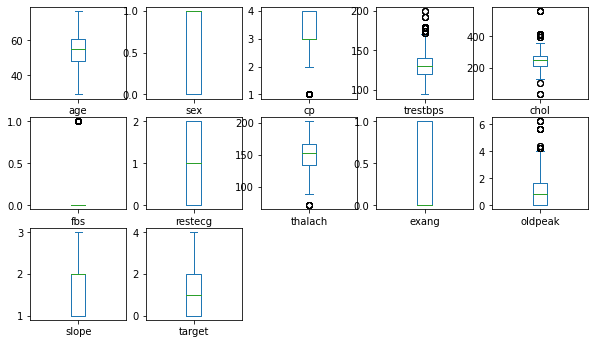

In [16]:
# Data visualizations

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(10,5),sharex=False, sharey=False, figsize=(10,20))
pyplot.show()

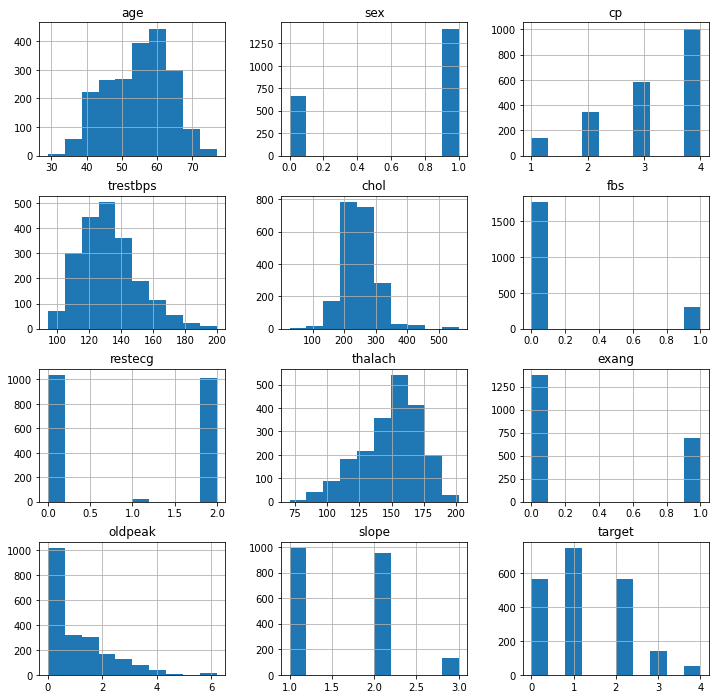

In [17]:
# histograms
dataset.hist(figsize=(12,12))
pyplot.show()

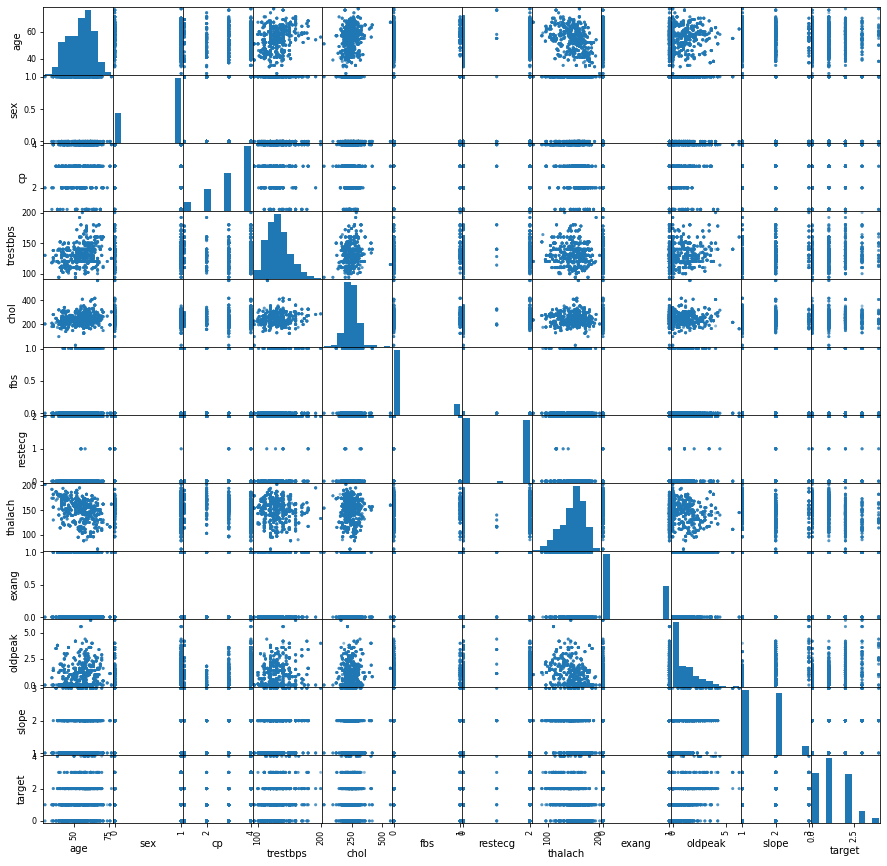

In [18]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(15,15))
pyplot.show()

In [20]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:11]
Y = array[:,11]
validation_size = 0.20
seed=7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [21]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [22]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


KNN: 0.936079 (0.026544)
CART: 0.996981 (0.004057)
NB: 0.568748 (0.044624)


In [23]:
# Standardize the dataset
pipelines = []

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


ScaledKNN: 0.936663 (0.021463)
ScaledCART: 0.996981 (0.004057)
ScaledNB: 0.526528 (0.049219)


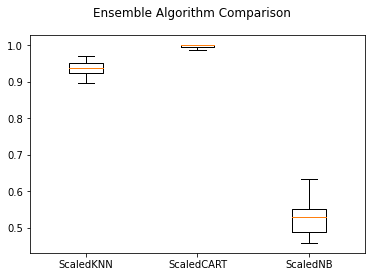

In [24]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [25]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.997583 using {'n_neighbors': 1}
0.997583 (0.004014) with: {'n_neighbors': 1}
0.974655 (0.012042) with: {'n_neighbors': 3}
0.935455 (0.022436) with: {'n_neighbors': 5}
0.874531 (0.019885) with: {'n_neighbors': 7}
0.815429 (0.022016) with: {'n_neighbors': 9}
0.762950 (0.031102) with: {'n_neighbors': 11}
0.725553 (0.021690) with: {'n_neighbors': 13}
0.697824 (0.021514) with: {'n_neighbors': 15}
0.685170 (0.019265) with: {'n_neighbors': 17}
0.680946 (0.024980) with: {'n_neighbors': 19}
0.666477 (0.029137) with: {'n_neighbors': 21}


In [30]:
# Finalize Model

# prepare the model
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsClassifier()
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9542168674698795
[[236   2   0   0   1]
 [  7  84   1   0   0]
 [  0   4  53   0   0]
 [  0   1   0  20   0]
 [  3   0   0   0   3]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       239
           1       0.92      0.91      0.92        92
           2       0.98      0.93      0.95        57
           3       1.00      0.95      0.98        21
           ?       0.75      0.50      0.60         6

    accuracy                           0.95       415
   macro avg       0.92      0.86      0.88       415
weighted avg       0.95      0.95      0.95       415

